# Logistic Regression : boolean operators

* Training logistic regression models for Boolean operators
* Requirements
    - AND, OR, XOR
        * you need to build a dataset for each operater
        * may not working for an operator
    - Use numpy arrays
        * Initialization with lists : x, y
        * Random initialization : w,b
    - Use numpy operator
        * inner product
        * Addition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Prepration

In [2]:
X = np.array([(0,0),(0,1),(1,0),(1,1)])
Y_AND = np.array([0,0,0,1])
Y_OR = np.array([0,1,1,1])
Y_XOR = np.array([0,1,1,0])

## Model & Train

In [3]:
class logistic_regression_model() :
    def __init__(self) :
        self.w = np.random.normal(size=2)
        self.b = np.random.normal(size=1)
    
    def sigmoid(self,z):
        s = 1 / (1 + np.exp(-z))
        return s
    
    def predict(self,x):
        z = np.inner(self.w,x) + self.b
        a = self.sigmoid(z)
        return a

In [4]:
def train(X,Y,model,lr=0.01, epoch = 10000, print_progess = False):
    
    # Output array of costs
    costs = []
    
    # Train for epoch times
    for ep in range(epoch) :
        
        # One step of training
        dw = np.array([0.0,0.0])
        db = np.array([0.0])
        m = len(X)
        cost = np.array([0.0])

        for x,y in zip(X,Y):
            a = model.predict(x)
            if y == 1:
                cost -= np.log(a)
            else :
                cost -= np.log(1-a)

            dw += (a-y)*x
            db += (a-y)

        cost /= m
        model.w -= lr*dw/m
        model.b -= lr*db/m
        
        # Print progress(cost) if true
        if print_progess :
            if ep % 100 == 0:
                print("epoch : " + str(epoch) +", cost : " + str(cost))
                
        # Add cost to output array
        costs.append(cost)
        
    return costs

## Prepration of Results

In [5]:
learning_rate = [0.1,0.01,0.001]
costs_AND = []
costs_OR = []
costs_XOR = []

def prediction_of_model(model) :
    print("pridiction of (0,0) : " + str(model.predict((0,0))))
    print("pridiction of (0,1) : " + str(model.predict((0,1))))
    print("pridiction of (1,0) : " + str(model.predict((1,0))))
    print("pridiction of (1,1) : " + str(model.predict((1,1))))

## Results

In [6]:
for lr in learning_rate :
    # learning rate 마다 model을 초기값으로 두기 위해
    AND_model = logistic_regression_model()
    OR_model = logistic_regression_model()
    XOR_model = logistic_regression_model()
    
    # 결과값 출력
    print("========== Learning rate : " + str(lr) + " ==========")
    
    cost_AND = train(X,Y_AND,AND_model,lr,10000,False)
    costs_AND.append(cost_AND)
    print("---------- AND model prediction ----------")
    prediction_of_model(AND_model)
    
    cost_OR = train(X,Y_OR,OR_model,lr,10000,False)
    print("---------- OR model prediction ----------")
    prediction_of_model(OR_model)
    costs_OR.append(cost_OR)
    
    cost_XOR = train(X,Y_XOR,XOR_model,lr,10000,False)
    
    print("---------- XOR model prediction ----------")
    prediction_of_model(XOR_model)
    costs_XOR.append(cost_XOR)
    print()

========== Learning rate : 0.1 ==========
---------- AND model prediction ----------
pridiction of (0,0) : [1.26673287e-05]
pridiction of (0,1) : [0.02035403]
pridiction of (1,0) : [0.02035402]
pridiction of (1,1) : [0.97149196]
---------- OR model prediction ----------
pridiction of (0,0) : [0.02068813]
pridiction of (0,1) : [0.99173717]
pridiction of (1,0) : [0.99173774]
pridiction of (1,1) : [0.99999853]
---------- XOR model prediction ----------
pridiction of (0,0) : [0.5]
pridiction of (0,1) : [0.5]
pridiction of (1,0) : [0.5]
pridiction of (1,1) : [0.5]

========== Learning rate : 0.01 ==========
---------- AND model prediction ----------
pridiction of (0,0) : [0.00848955]
pridiction of (0,1) : [0.15367303]
pridiction of (1,0) : [0.14706681]
pridiction of (1,1) : [0.78524875]
---------- OR model prediction ----------
pridiction of (0,0) : [0.18078035]
pridiction of (0,1) : [0.92587761]
pridiction of (1,0) : [0.93367711]
pridiction of (1,1) : [0.99874666]
---------- XOR model pred

## 그래프로 나타낸 결과값

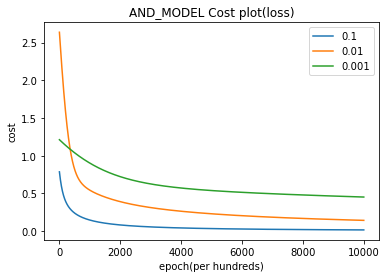

In [7]:
plt.plot(costs_AND[0])
plt.plot(costs_AND[1])
plt.plot(costs_AND[2])
plt.legend(["0.1","0.01","0.001"])

plt.ylabel('cost')
plt.xlabel('epoch(per hundreds)')
plt.title("AND_MODEL Cost plot(loss)")
plt.show()

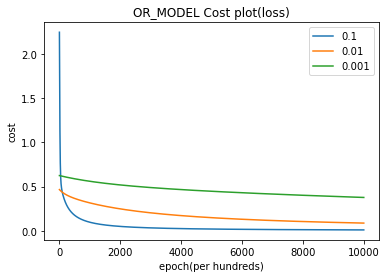

In [8]:
plt.plot(costs_OR[0])
plt.plot(costs_OR[1])
plt.plot(costs_OR[2])
plt.legend(["0.1","0.01","0.001"])
plt.ylabel('cost')
plt.xlabel('epoch(per hundreds)')
plt.title("OR_MODEL Cost plot(loss)")
plt.show()

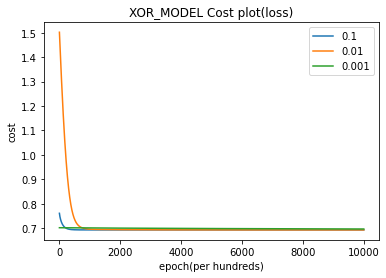

In [9]:
plt.plot(costs_XOR[0])
plt.plot(costs_XOR[1])
plt.plot(costs_XOR[2])
plt.legend(["0.1","0.01","0.001"])
plt.ylabel('cost')
plt.xlabel('epoch(per hundreds)')
plt.title("XOR_MODEL Cost plot(loss)")
plt.show()